In [ ]:
#from iql import run_training
from iql_gym import run_training
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os 
import datetime
from pprint import pprint
from distutils.util import strtobool
import argparse 
import yaml
import numpy as np
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(rc={'figure.figsize':(4,3)})
from scipy.ndimage import gaussian_filter1d
import itertools
import pprint


2023-08-23 17:13:13.543167: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-23 17:13:13.728376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 17:13:14.439692: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
!ls

archives      iql_gym.py	  run_smac.py	       water_bomber_gym.py
cmd.txt       iql.py		  simultaneous_env.py
config	      __pycache__	  visualisation.ipynb
eval_prio.py  run_experiments.py  water_bomber_env.py


In [4]:
path = Path("/home/nono/Documents/Dassault/Water-Bomber-Env/results/2023-08-22_18:25:02-env_id-batch_size")

In [180]:
with open(Path('config/simultaneous/default.yaml')) as f:
    params = yaml.safe_load(f)

with open(path/'params_const.yaml', 'r') as f:
    params_const = yaml.safe_load(f)

with open(path/'params_list_choice.yaml', 'r') as f:
    params_list_choice = yaml.safe_load(f)

results_df = pd.read_csv(path/ 'eval_prio.csv')

modified_params = list(params_list_choice.keys())
modified_params

['batch_size']

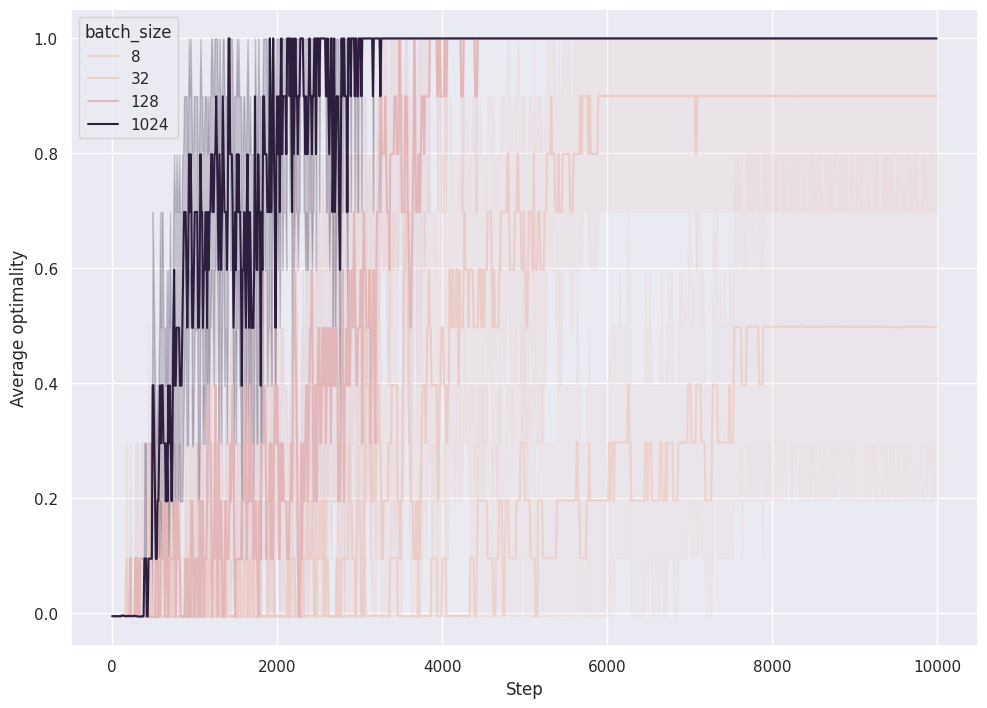

In [6]:
def plot_df(results_df):
  sns.lineplot(x="Step", y="Average optimality",
             hue=modified_params[0], style=modified_params[1] if len(modified_params) > 1 else None,
             data=results_df, errorbar=('ci', 90))
  plt.show()

plot_df(results_df)
#plt.savefig(path/'eval_prio.svg', format='svg')

In [7]:
#results_df[results_df['batch_size']==1024].plot(x='Step', y='Average optimality', '*')

In [8]:
results_df[results_df['batch_size']==1024].describe()#['Average optimality']

,Average optimality,Run,Step,batch_size
count,10000.000000,10000.000000,10000.000000,10000.0
mean,0.882534,4.500000,4995.000000,1024.0
std,0.323030,2.872425,2886.894251,0.0
min,-0.006890,0.000000,0.000000,1024.0
25%,1.000000,2.000000,2497.500000,1024.0
50%,1.000000,4.500000,4995.000000,1024.0
75%,1.000000,7.000000,7492.500000,1024.0
max,1.000000,9.000000,9990.000000,1024.0


In [9]:
results_df[results_df['batch_size']==1024][results_df['Step']==0]

/tmp/ipykernel_4721/486171145.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df[results_df['batch_size']==1024][results_df['Step']==0]


,Average optimality,Run,Step,batch_size
3000,-0.004921,0,0,1024
7000,-0.004921,1,0,1024
11000,-0.001969,2,0,1024
15000,-0.002953,3,0,1024
19000,-0.005906,4,0,1024
23000,-0.004921,5,0,1024
27000,-0.004921,6,0,1024
31000,-0.004921,7,0,1024
35000,-0.006890,8,0,1024
39000,-0.004921,9,0,1024


In [10]:
results_df[results_df['batch_size']==1024][results_df['Run']==0]

/tmp/ipykernel_4721/501442311.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df[results_df['batch_size']==1024][results_df['Run']==0]


,Average optimality,Run,Step,batch_size
3000,-0.004921,0,0,1024
3001,-0.004921,0,10,1024
3002,-0.004921,0,20,1024
3003,-0.004921,0,30,1024
3004,-0.004921,0,40,1024
...,...,...,...,...
3995,1.000000,0,9950,1024
3996,1.000000,0,9960,1024
3997,1.000000,0,9970,1024
3998,1.000000,0,9980,1024


In [11]:
list(itertools.product(*params_list_choice.values()))

[(8,), (32,), (128,), (1024,)]

In [112]:
modified_params = list(params_list_choice.keys())
for run in range(10):
  for param_values in itertools.product(*params_list_choice.values()):
    mask = results_df['Run']==run
    for mod_param, param_value in zip(modified_params, param_values):
      mask &= results_df[mod_param]==param_values
    #print(mask)
    #print(results_df[mask])
    results_df[mask]['Average optimality'] = gaussian_filter1d(results_df[mask]['Average optimality'], mode='nearest', sigma=2)

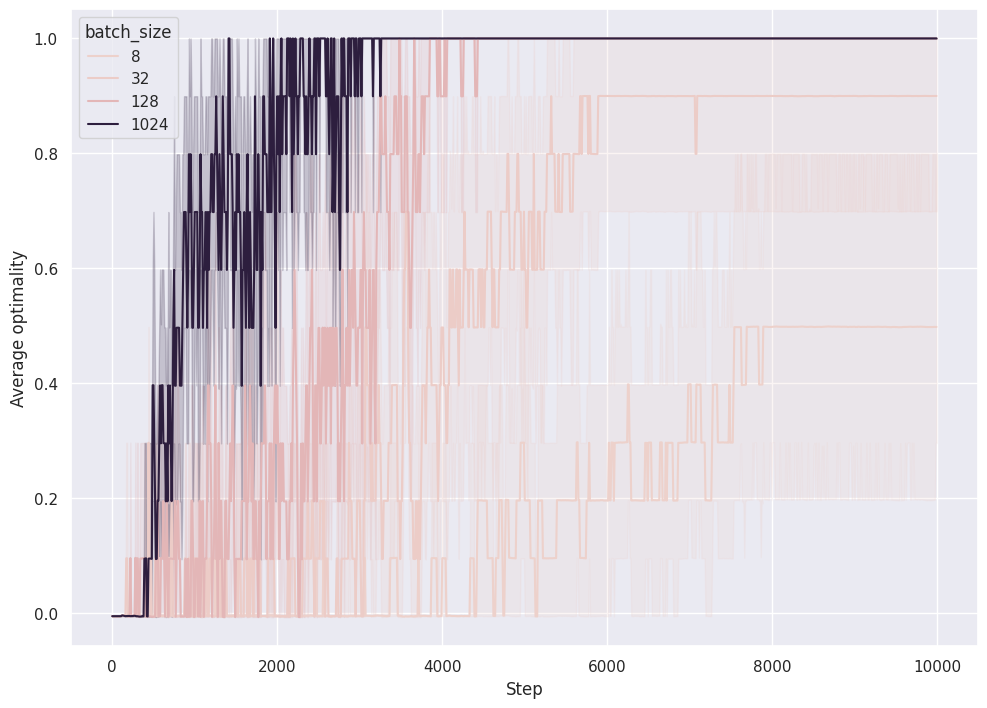

In [13]:

plot_df(results_df)

In [14]:
d = params_list_choice

In [16]:
list(itertools.product(*d.values()))

[]

In [31]:
 results_df[results_df['batch_size']==1024]

,Average optimality,Run,Step,batch_size
3000,-0.004921,0,0,1024
3001,-0.004921,0,10,1024
3002,-0.004921,0,20,1024
3003,-0.004921,0,30,1024
3004,-0.004921,0,40,1024
...,...,...,...,...
39995,1.000000,9,9950,1024
39996,1.000000,9,9960,1024
39997,1.000000,9,9970,1024
39998,1.000000,9,9980,1024


In [32]:
results_df[results_df['batch_size']==1024].groupby(['Step']).mean()

,Average optimality,Run,batch_size
Step,,,
0,-0.004724,4.5,1024.0
10,-0.004724,4.5,1024.0
20,-0.004724,4.5,1024.0
30,-0.004724,4.5,1024.0
40,-0.004724,4.5,1024.0
...,...,...,...
9950,1.000000,4.5,1024.0
9960,1.000000,4.5,1024.0
9970,1.000000,4.5,1024.0


In [42]:
X = np.linspace(0, 5, 100)
Y = np.exp(X) + np.random.randn(100)



In [66]:
pd.DataFrame(Y)

Average optimality
Step batch_size                    
0    8                    -0.004724
     32                   -0.004724
     128                  -0.004724
     1024                 -0.004724
10   8                    -0.004724
...                             ...
9980 1024                  1.000000
9990 8                     0.498327
     32                    0.899902
     128                   1.000000
     1024                  1.000000

[4000 rows x 1 columns]

In [84]:
Y

,batch_size,Average optimality
Step,,
0,8,-0.004724
0,32,-0.004724
0,128,-0.004724
0,1024,-0.004724
10,8,-0.004724
...,...,...
9980,1024,1.000000
9990,8,0.498327
9990,32,0.899902


In [83]:
Y = Y.reset_index(level=['batch_size'])
Y['batch_size']

Step
0          8
0         32
0        128
0       1024
10         8
        ... 
9980    1024
9990       8
9990      32
9990     128
9990    1024
Name: batch_size, Length: 4000, dtype: int64

In [71]:
Y[Y['batch_size']==8].plot()

KeyError: 'batch_size'

In [102]:
Y

,batch_size,Average optimality
Step,,
0,8,-0.004724
0,32,-0.004724
0,128,-0.004724
0,1024,-0.004724
10,8,-0.004724
...,...,...
9980,1024,1.000000
9990,8,0.498327
9990,32,0.899902


In [193]:
df = results_df.groupby(['Step', 'batch_size'])[["Average optimality"]]
Y = df.mean()
Y = Y.reset_index(level=['batch_size'])

std = df.std()
std = std.reset_index(level=['batch_size'])



In [117]:
Y

,batch_size,Average optimality
Step,,
0,8,-0.004724
0,32,-0.004724
0,128,-0.004724
0,1024,-0.004724
10,8,-0.004724
...,...,...
9980,1024,1.000000
9990,8,0.498327
9990,32,0.899902


In [120]:
Y

,batch_size,Average optimality
Step,,
0,8,-0.004724
0,32,-0.004724
0,128,-0.004724
0,1024,-0.004724
10,8,-0.004724
...,...,...
9980,1024,1.000000
9990,8,0.498327
9990,32,0.899902


In [122]:
Y['batch_size']==8

Step
0        True
0       False
0       False
0       False
10       True
        ...  
9980    False
9990     True
9990    False
9990    False
9990    False
Name: batch_size, Length: 4000, dtype: bool

In [208]:
std

,batch_size,Average optimality
Step,,
0,8,0.001376
0,32,0.001376
0,128,0.001376
0,1024,0.001376
10,8,0.001376
...,...,...
9980,1024,0.000000
9990,8,0.528812
9990,32,0.316539


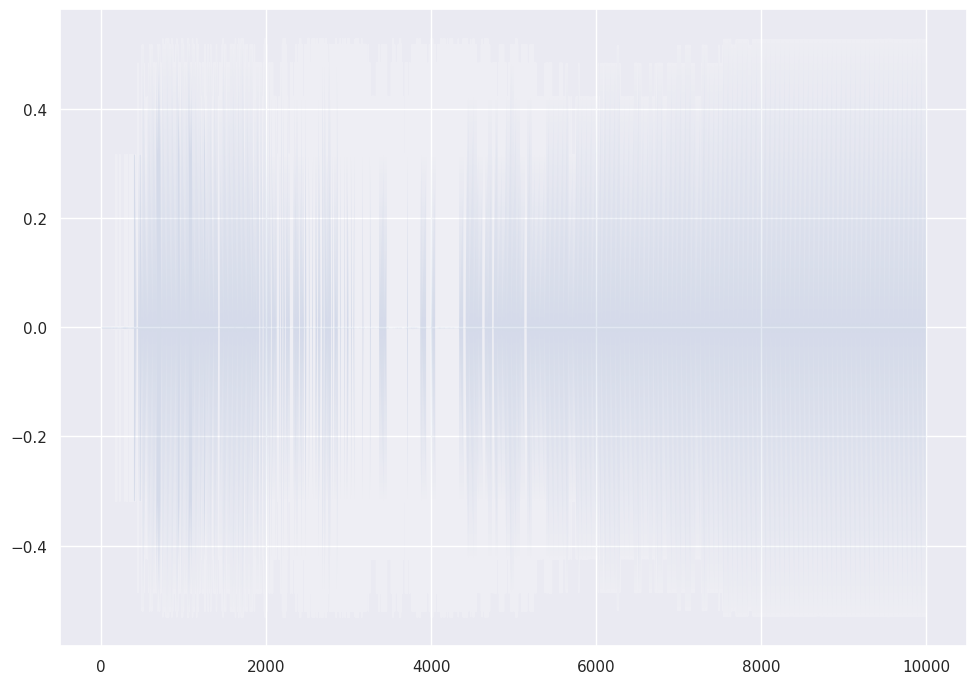

In [209]:
plt.fill_between(std.index, - std['Average optimality'], + std['Average optimality'], alpha=0.2)

batch_size 8
batch_size 32
batch_size 128
batch_size 1024


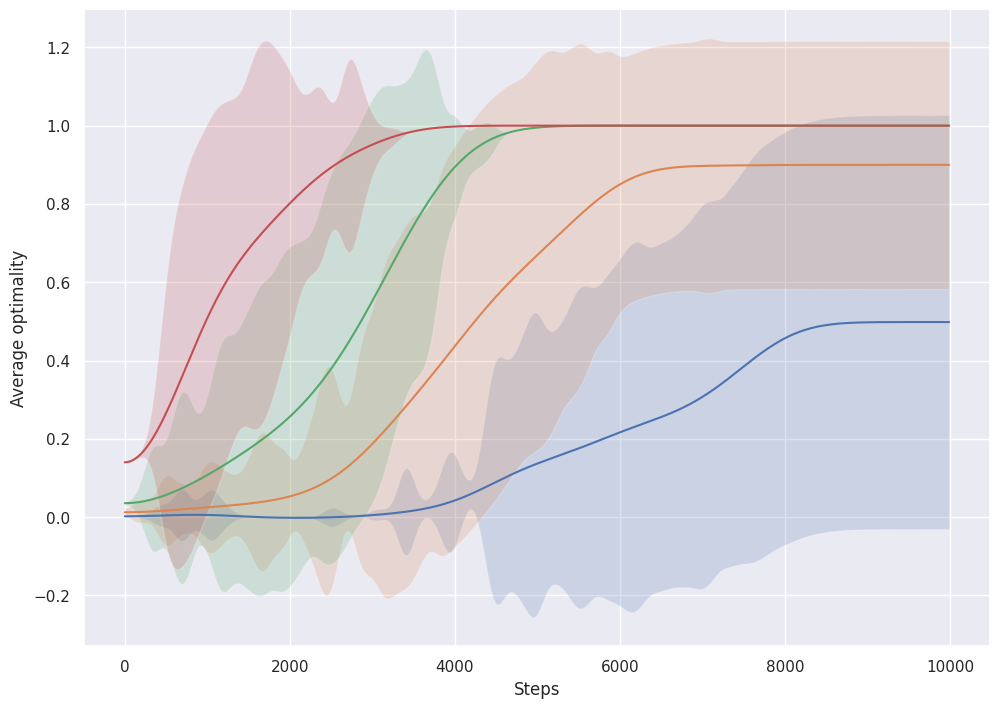

In [216]:

modified_params = list(params_list_choice.keys())
for param_values in itertools.product(*params_list_choice.values()):
  for mod_param, param_value in zip(modified_params, param_values):
    print(mod_param, param_value )
    mask = Y[mod_param]==param_values

  plt.xlabel('Steps')
  plt.ylabel('Average optimality')
  X = std[mask].index

  #print(mask)
  Y_smooth = gaussian_filter1d(Y[mask]['Average optimality'], sigma=50)
  plt.plot(X, Y_smooth)
  err = gaussian_filter1d(std[mask]['Average optimality'], sigma=10)
  #Y.loc[mask,'Average optimality'] = gaussian_filter1d(Y[mask]['Average optimality'], sigma=10)
  plt.fill_between(X, Y_smooth - err, Y_smooth + err, alpha=0.2)
plt.show()


<Axes: xlabel='Step', ylabel='Average optimality'>

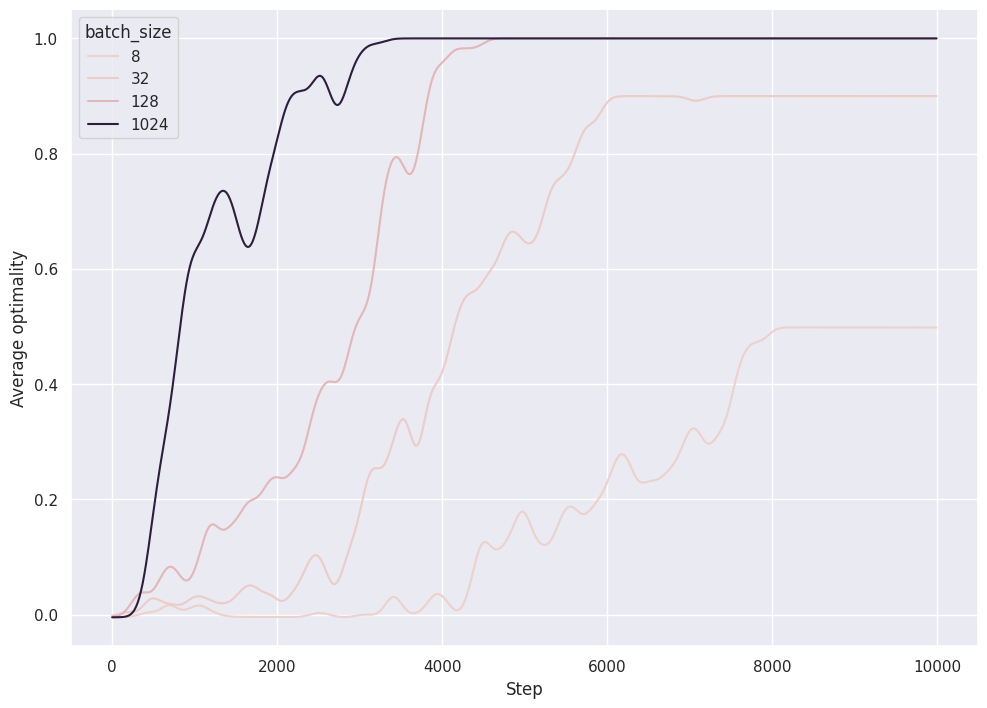

In [183]:

sns.lineplot(data=Y, x="Step", y="Average optimality", hue='batch_size')

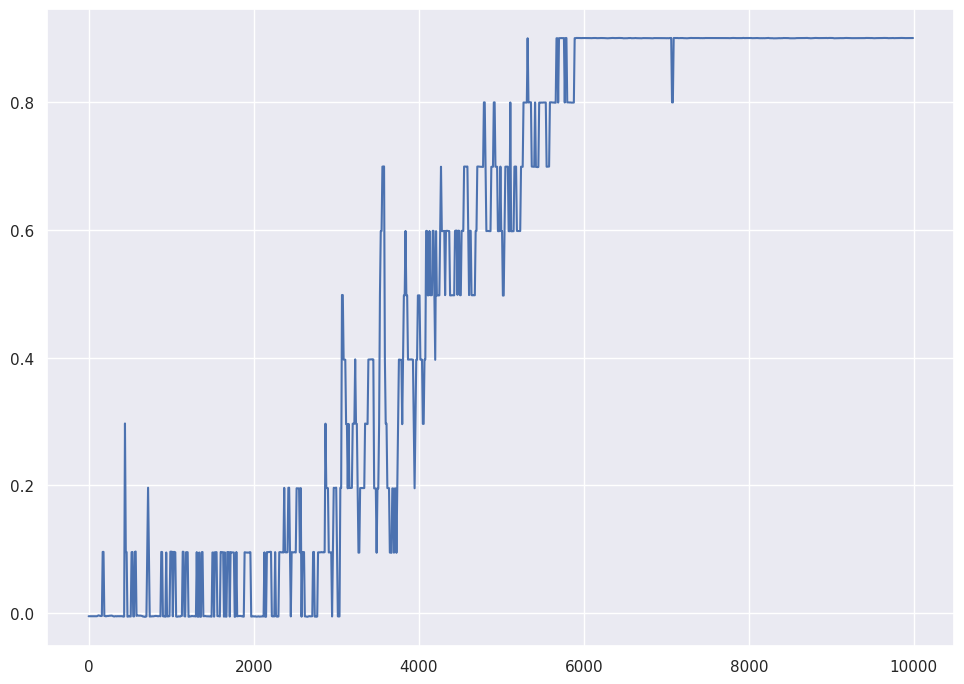

In [95]:
plt.plot(Y[Y['batch_size']==32]['Average optimality'])

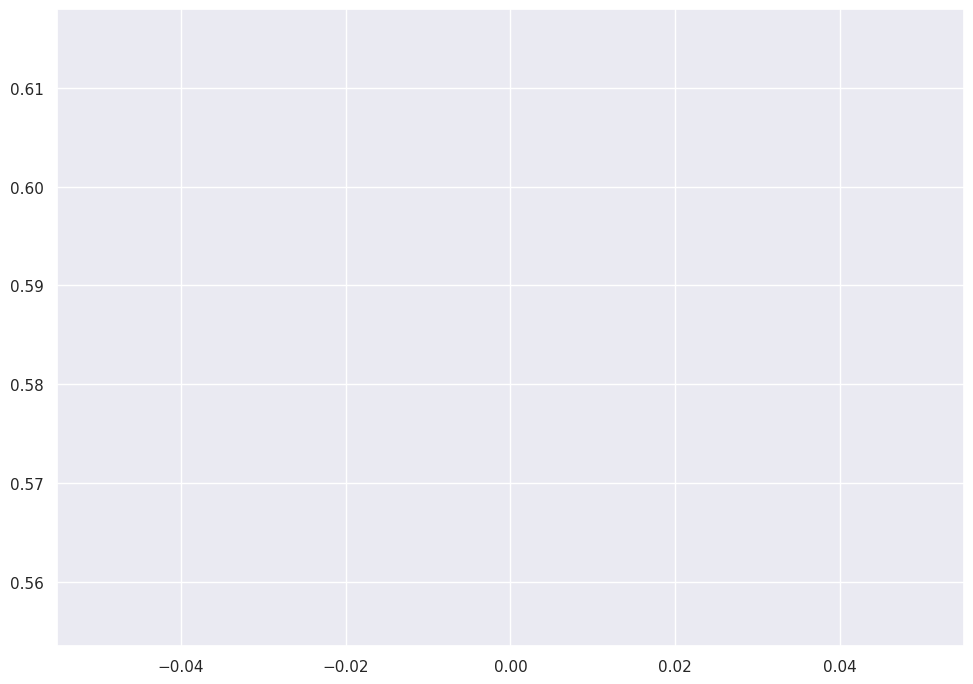

In [86]:
df = results_df.groupby(['Step', 'batch_size']).mean()[["Average optimality"]]
Y = df.mean()
sigma = df.std()
#Y = results_df[results_df['batch_size']==1024][results_df['Run']==0]['Average optimality']
plt.plot(gaussian_filter1d(Y, sigma=1))

In [87]:
Y

Average optimality    0.585746
dtype: float64